In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily
from keplergl import KeplerGl

In [2]:
roads = gpd.read_file('../data/egypt/gis_osm_roads_free_1.shp').to_crs(epsg=4326)

In [3]:
roads.shape

(1807496, 11)

In [4]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4393316,5122,residential,None,None,B,0,0,F,F,"LINESTRING (34.5149 28.50103, 34.51491 28.5010..."
1,4393318,5115,tertiary,None,None,F,0,0,F,F,"LINESTRING (34.50649 28.50739, 34.50653 28.507..."
2,4393320,5142,track,None,None,B,0,0,F,F,"LINESTRING (34.46467 28.44007, 34.46461 28.440..."
3,4393324,5124,pedestrian,شارع المسبط,None,B,0,0,F,F,"LINESTRING (34.51665 28.49678, 34.51663 28.496..."
4,4393325,5124,pedestrian,None,None,B,0,0,F,F,"LINESTRING (34.5114 28.47745, 34.51163 28.4779..."


In [5]:
roads.isnull().sum()

osm_id            0
code              0
fclass            0
name        1563293
ref         1803361
oneway            0
maxspeed          0
layer             0
bridge            0
tunnel            0
geometry          0
dtype: int64

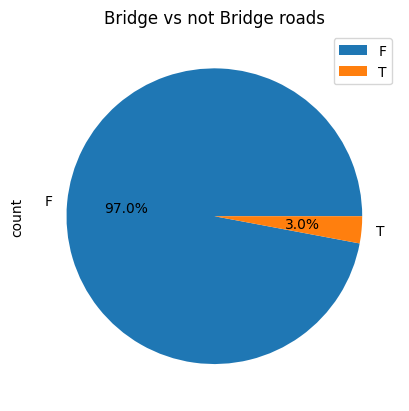

In [27]:
roads['bridge']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("Bridge vs not Bridge roads")
plt.show()

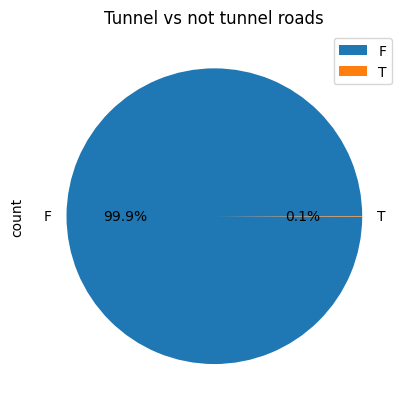

In [28]:
roads['tunnel']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("Tunnel vs not tunnel roads")
plt.show()

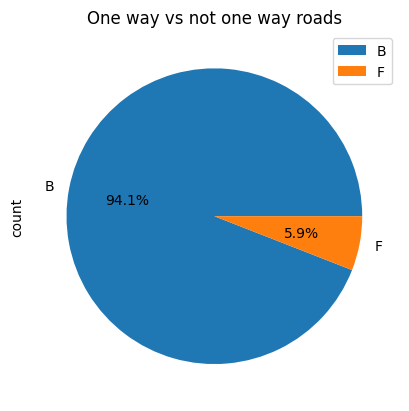

In [8]:
roads['oneway']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("One way vs not one way roads")
plt.show()

In [9]:
roads['layer'].value_counts()

layer
 0    1753314
 1      52942
-1       1032
 2        188
 3         10
-2          8
 4          1
 5          1
Name: count, dtype: int64

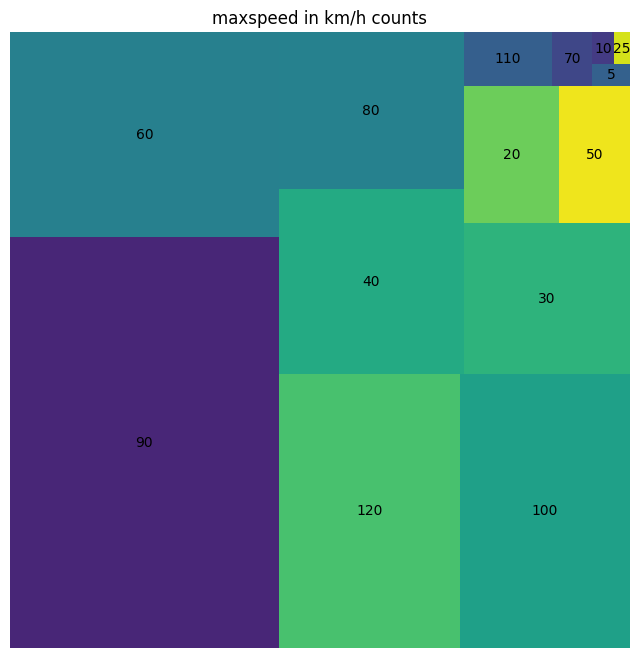

In [10]:
import squarify

speeds = roads['maxspeed']\
  .value_counts()\
  .reset_index()

speeds = speeds[speeds['maxspeed'] > 0]

plt.figure(figsize=(8,8))
squarify.plot(sizes=speeds['count'], label=speeds['maxspeed'])
plt.axis('off')
plt.title('maxspeed in km/h counts')
plt.show()

### Description of feature: "oneway" from OSM:

Is this a oneway road? “F” means that only driving
in direction of the linestring is allowed. “T” means
that only the opposite direction is allowed. “B”
(default value) means that both directions are ok.

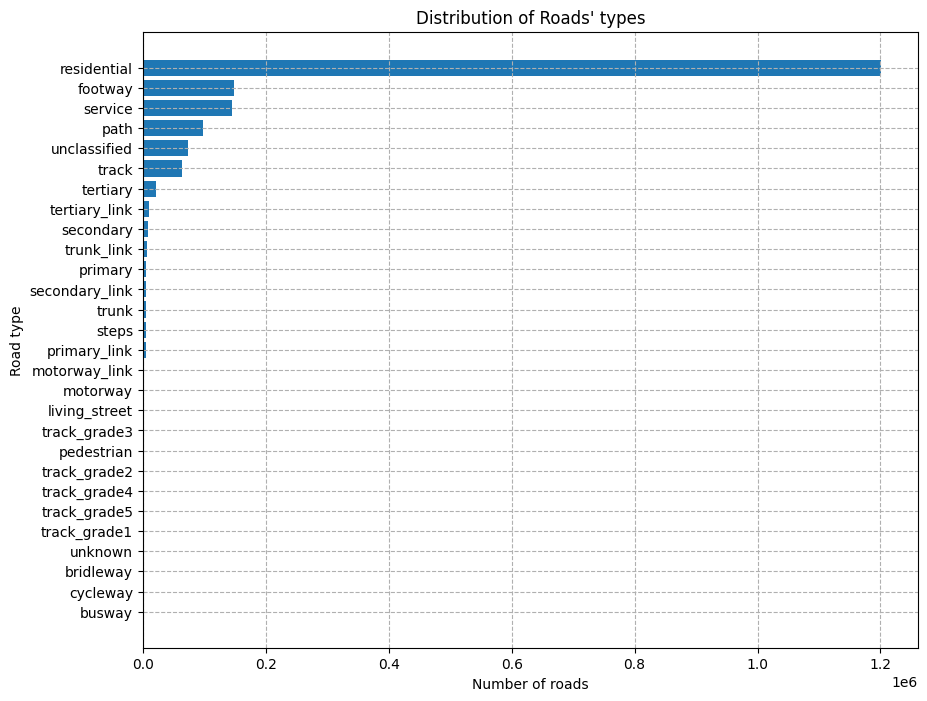

In [11]:
road_type_counts = roads['fclass'].value_counts().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(
  y=road_type_counts.index, 
  width=road_type_counts.values,

  )
plt.grid(linestyle='--')
plt.title("Distribution of Roads' types")
plt.xlabel("Number of roads")
plt.ylabel("Road type")
plt.show()

In [6]:
boundaries = gpd.read_file('../data/adminlevel2/egy_admbnda_adm2_capmas_20170421.shp').to_crs(epsg=4326)

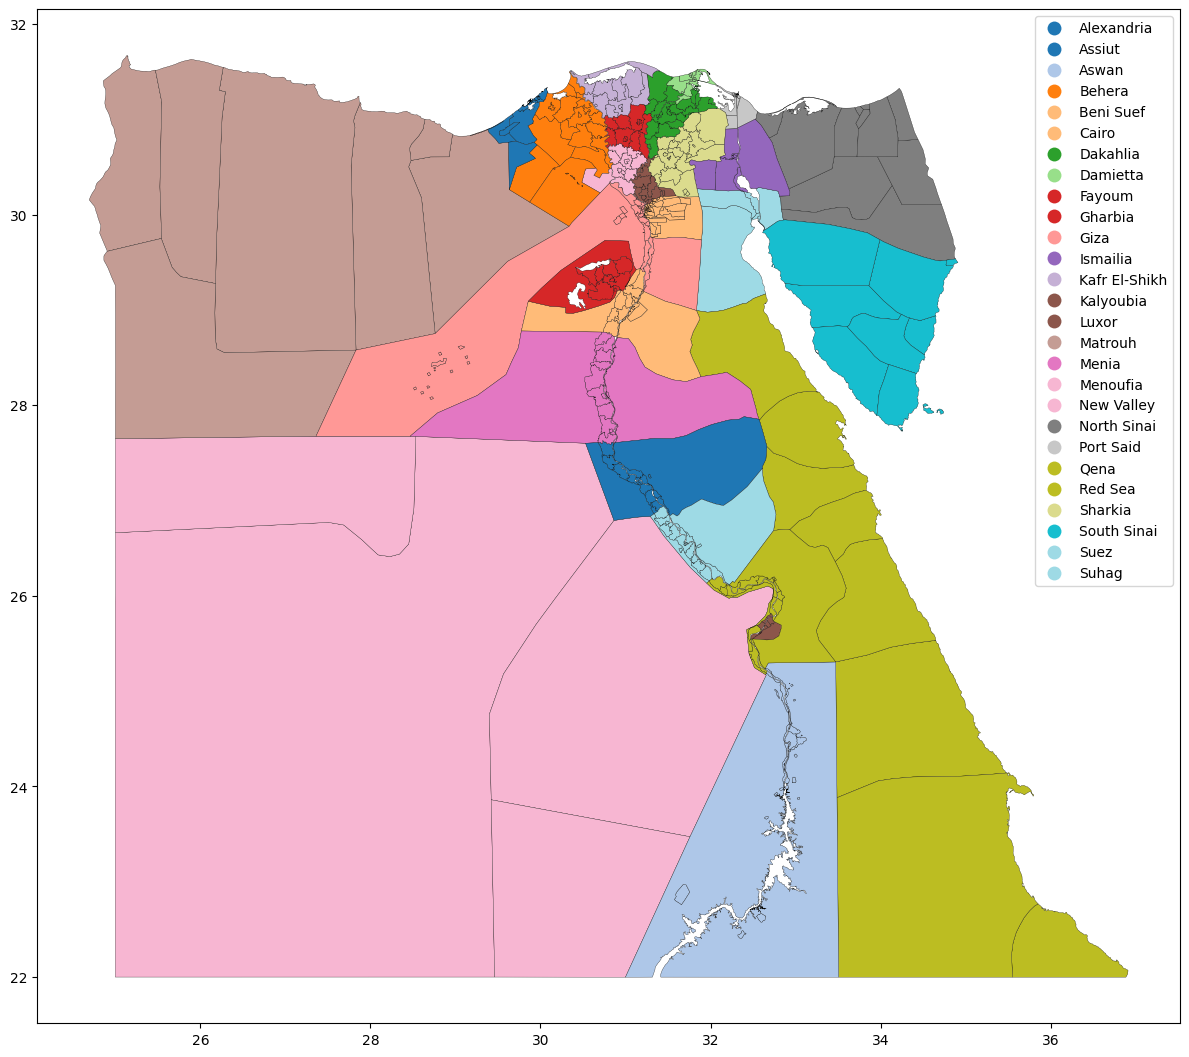

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
boundaries.plot(column='ADM1_EN',  cmap='tab20', 
  edgecolor='black',  
  linewidth=0.2, legend=True, ax=ax)
plt.tight_layout()

In [8]:
joined = gpd.sjoin(roads, boundaries, how='left', predicate="within")

In [9]:
joined.shape

(1807496, 31)

In [10]:
joined.columns

Index(['osm_id', 'code', 'fclass', 'name', 'ref', 'oneway', 'maxspeed',
       'layer', 'bridge', 'tunnel', 'geometry', 'index_right', 'ADM2_EN',
       'ADM2_AR', 'ADM2_PCODE', 'ADM2_REF', 'ADM2ALT1EN', 'ADM2ALT2EN',
       'ADM2ALT1AR', 'ADM2ALT2AR', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE',
       'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'date', 'validOn', 'ValidTo',
       'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [11]:
joined['ADM1_EN'].unique()

array(['South Sinai', nan, 'Red Sea', 'Kafr El-Shikh', 'Cairo', 'Aswan',
       'Giza', 'Dakahlia', 'Luxor', 'Alexandria', 'Ismailia',
       'North Sinai', 'Suez', 'Matrouh', 'Kalyoubia', 'Behera', 'Menia',
       'Assiut', 'New Valley', 'Qena', 'Port Said', 'Damietta', 'Sharkia',
       'Gharbia', 'Fayoum', 'Beni Suef', 'Suhag', 'Menoufia'],
      dtype=object)

In [19]:
# Select only alexandria
final = joined[joined['ADM1_EN'] == 'Alexandria']

final = final[['fclass', 'name', 'oneway', 'maxspeed', 'bridge', 'tunnel',
                      'geometry', 'ADM2_EN', 'ADM1_EN', 'Shape_Area']]

final['index'] = final.index

In [20]:
final['ADM2_EN'].unique()

array(['Sidi Gabir', 'Bab Sharqi', 'Al Attarin', 'Muharam Bik',
       'Al Amreia', 'Al Gumruk', 'Al Dikhila', 'Al Manshiyya', 'Al Raml',
       'Kesm than Al Raml', 'Karmuz', 'Muntazah', 'Mina Al-Basal',
       'Port Alexandria Police Department', 'Burg al-Arab',
       'Burg Al-Arab City', 'Zemam Out', 'A L Labban', 'North Coast'],
      dtype=object)

In [21]:
final.to_file("../data/egypt/geo.geojson", driver='GeoJSON')